## To run this file locally please download the corrsponding lyotLib.ipynb and put it in your path with this file.

The lyotLib notebook provides the code to create the stage plots and load the ucomp lyot filter config files.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
%run lyotLib.ipynb

### Birefringent filters

Lyot filters are built in stages in which a single stage is configured with two linear polarizers mounted with their polarization axis at 0 degrees.  Sandwiched between these polarizers is a birefringent crystal with its fast and slow axises orited at + and - 45 degrees to the polarizes.   


When an unpolarized beam of light is projected through one of these stages, the first polarizer acts as an input control, ensuring ½ of the light goes down each fast and slow axe.  The second polarizer acts as an analyzer. If the path length of the two axes is different by an exact wavelength multiple, it will produce constructive intefernace and allow 100% of the signal to pass.  However, if the path length is some multiple of the wavelength +½ of the wavelength, the light will complete destructive interference at the analyzer, and no signal will get thru.  

Since this path length change is proportional to the physical thickness of the crystal in the stage; it acts like a periodic filter that can be locially approximated as a cosine function.   Do demonstrate this behavior (and other interesting features of the ucomp lyot filter we have built the createStages function, which will allow us to explore the filter.

Where 
stages = the number of stages in the filter  (defualt value is 5)
width = how may FSR ranges to display in the plot (default value is 1)


[Text(0, 0.5, 'Tranmission'),
 Text(0.5, 0, 'Number of waves from centeral wavelength')]

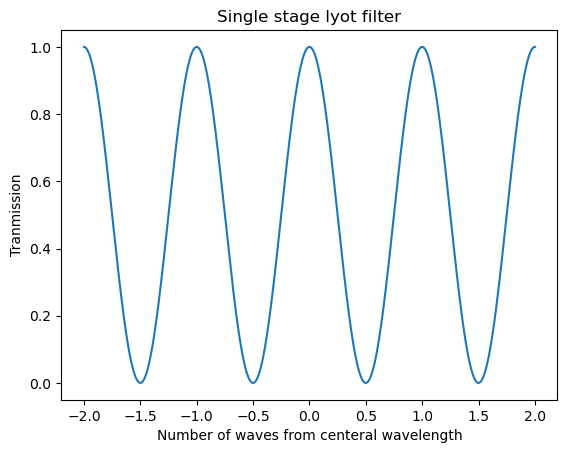

In [2]:
fig, ax = plt.subplots()
ax.plot(*createStages(stages=1,width=4))
ax.set_title('Single stage lyot filter')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")

If we double the crystal thickness, we end up with a crystal in which the interface cosine function has twice the frequency.  And if we chain these two crystals together with the output of the first stage passing into the second, this acts like multiplying two cosine functions together.   For the createStages code, we can convert the cosine function to physical length units by specifying the Free Spectral Range of a crystal in the filterConfig dictionary.

We can see in the plots below that the thicker crystal with ½ the FSR has peaks and nulls at twice the frequency as the narrow crystal.  And when combined, every other peak constructively and destructively interferes, leaving us with a narrower central peak and less transmission in the wings. 

Where:
filterConfig = a dictionary of configuration items for the plot.  And here, we are only setting the FSR, which has a default of 1.


[Text(0, 0.5, 'Tranmission'),
 Text(0.5, 0, 'Number of waves from centeral wavelength')]

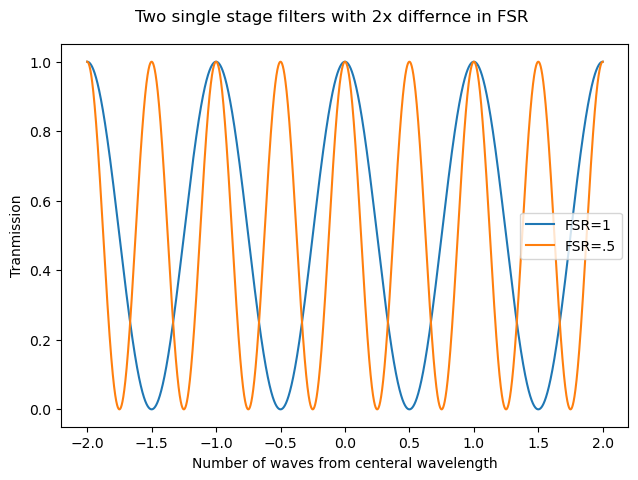

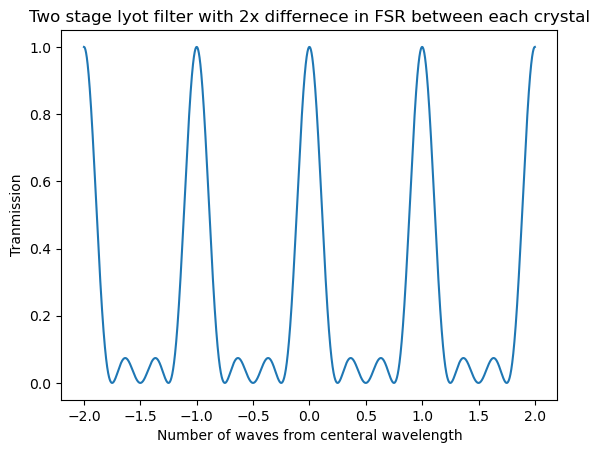

In [3]:

fig, ax = plt.subplots()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
ax.plot(*createStages(stages=1,width=4,filterConfig={"FSR":1}),label="FSR=1")
ax.plot(*createStages(stages=1,width=8,filterConfig={"FSR":.5}),label="FSR=.5")
fig.suptitle('Two single stage filters with 2x differnce in FSR ')
#ax.set_title("FSR = 1")
#ax.set_title("FSR = .5")
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()


fig, ax = plt.subplots()
ax.plot(*createStages(stages=2,width=4))
ax.set_title('Two stage lyot filter with 2x differnece in FSR between each crystal')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")


If we add more stages with double the thickness of the next smallest crystal, we will create increassingly narrow centeral wavelengths while we continue to bead down the ringing in the wings.  For example, with the 5 stage UCoMP lyot fitler, we get a much sharper emission peak.  Here we have zoomed in, to just focus on the shape of the central peak, but like the plots shown above this is a peroidic filter that rings to infinity repeating this patter in either direction.  

[Text(0, 0.5, 'Tranmission'),
 Text(0.5, 0, 'Number of waves from centeral wavelength')]

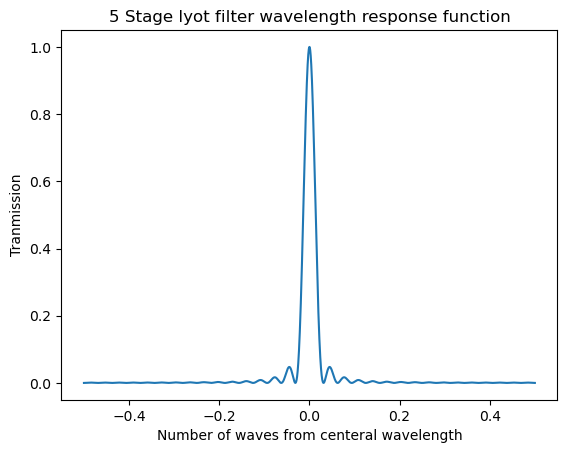

In [4]:

fig, ax = plt.subplots()
ax.plot(*createStages(stages=5))
ax.set_title('5 Stage lyot filter wavelength response function')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")


At this point, we have developed the ability to produce very narrow wavelength filters, only depending on our precision machining crystals. Unfortunately, it is hard to get crystal thickness machined to wavelength fractions; the filter response is fixed in the machine shop.

Suppose we insert a Liquid Crystal Variable Retarder (LCVR) behind the birefringent crystal.  We can use the LCVR to add path length to one axis.  By adjusting the voltages sent to the LCVR, we can change the retardance of the who stage and effectively change the path length of the stage.    Adding an LCVR gives us two powerful things; first, we only have to get the crystals cut flat and close to the needed thickness, saving complex machining; second, we can now tune the bandpass of the filter at the telescope.

Below is an example of our tuning changes in our three wavelength waves program in UCoMP.




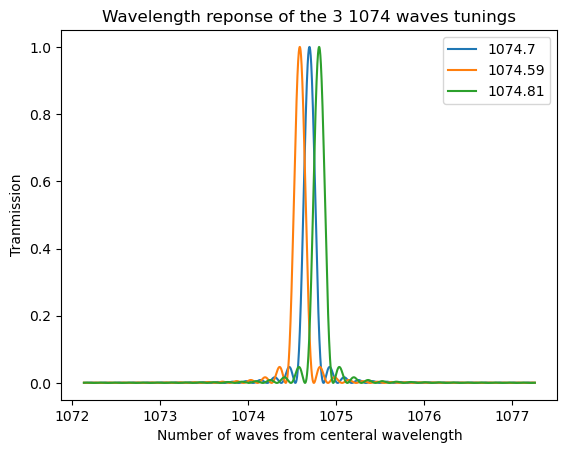

In [5]:
filterConfig1074 = getFilterConfig("tuning_calibration_1074.7.ini")

fig, ax = plt.subplots()
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.59),label="1074.59")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.81),label="1074.81")
ax.set_title('Wavelength reponse of the 3 1074 waves tunings')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()

To calibrate the intensity of measurements we take in UCoMP, we make measurements of both the coronal emission line and the continuum from a nearby region of the spectrum. Given what we have seen about our ability to vary the measurement wavelength, we could access the continuum by re-tuning the filter and taking another data set. But we would like to measure the continuum simultaneously with the coronal signal. Here we can note that if we rotate an analyzer polarizer by 90 degrees, we are now looking at light that effectively has a pi/2 phase shift in the crystals. So if we put one of the narrow stages at the back of the filter and replace the linear polarizer with a polarizing beamsplitter, the lyot filter now has two, one near the central wavelength and one centered ½ FSR (or the narrow crystal) away.  

To handle optical or other asymmetries between the throughput of two arms/cameras in UCoMP, we beam swap the central wavelength and continuum signals back and fother between the cameras while taking data. In the default configuration, the central emission line passes to the transmitted while the continuum is sent to the reflected arm. Still, if we add a phase of pi/2 to the last crystal in the stack (2nd thinnest), we now transmit the continuum thru the beam slipper and reflect the central wavelength.


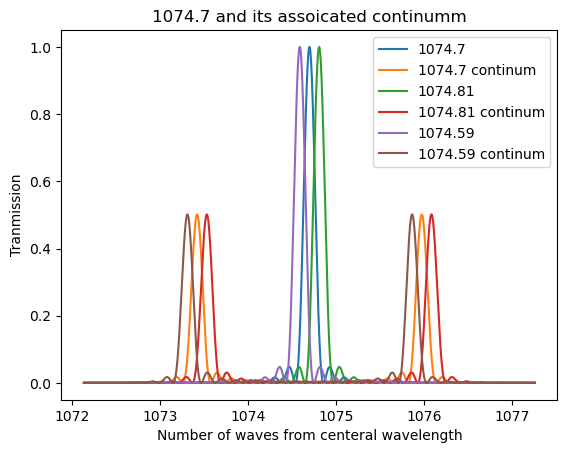

In [6]:
filterConfig1074 = getFilterConfig("tuning_calibration_1074.7.ini")

fig, ax = plt.subplots()
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband"),label="1074.7 continum")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.81),label="1074.81")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.81,cam="offband"),label="1074.81 continum")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.59),label="1074.59")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.59,cam="offband"),label="1074.59 continum")
ax.set_title('1074.7 and its assoicated continumm')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()

In this scheme, the continuum location w.r.t. the central wavelength is a fixed distance defined by the filter FSR. So if there were a strong solar or atmospheric line in the continuum location, we wouldn't get the wrong answer. To account for this, UCoMP can change from a 50/50 split of the light coming from the red and blue wings to one in which we get an 85/15 favoring either the red or blue wing. To accomplish this, we send a pi/8 phase offset to stage0 (the thinnest crystal). The red/blue continuum shift is not a perfect solution for dealing with a strong emission line as we are still getting about 15% of our signal from this "bad" part of the continuum, but without changing the crystal thickness, there is not a lot that can be done. 


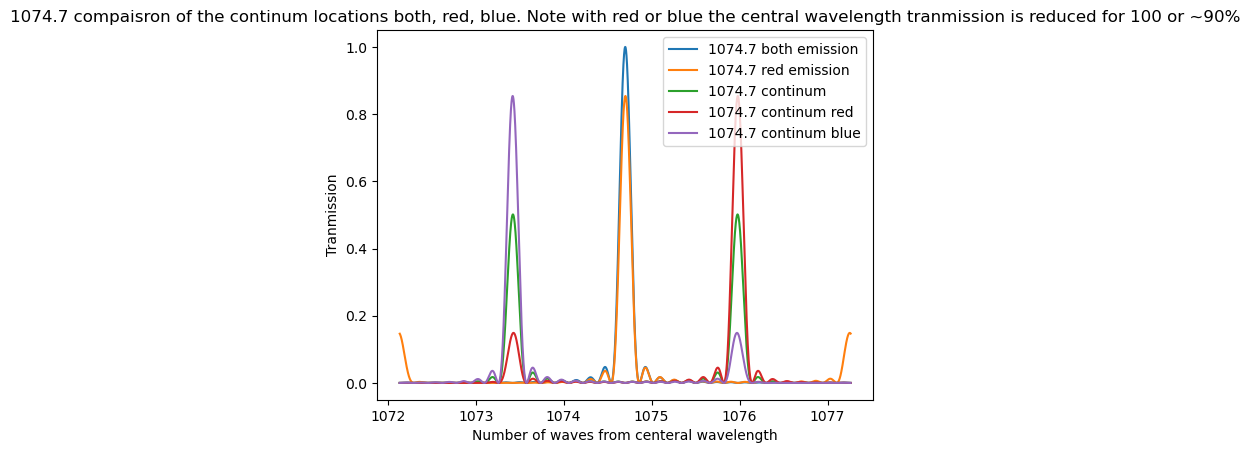

In [7]:
filterConfig1074 = getFilterConfig("tuning_calibration_1074.7.ini")

fig, ax = plt.subplots()
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7 both emission")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cont="red"),label="1074.7 red emission")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband"),label="1074.7 continum")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband",cont="red"),label="1074.7 continum red")
ax.plot(*createStages(filterConfig=filterConfig1074,wavelength=1074.7,cam="offband",cont="blue"),label="1074.7 continum blue")
ax.set_title('1074.7 compaisron of the continum locations both, red, blue. Note with red or blue the central wavelength tranmission is reduced for 100 or ~90%')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()

The UCoMP lyot filter is based on lithium niobate crystals; these lab-grown crystals offer large clear apertures and can be made with uniform properties in much larger physical sizes than the calcite crystals typically used on lyot filters. The one major drawback of these crystals is the birefringence of the crystal has a strong temperature coefficient. A tenth-of-a-degree change in the crystals completely throws off the calibrations. To account for we actively head the instrument box to ~33C and the filter to 35C with thermal blankets and a high-precision thermal control system. We also attached a milidegree thermometer to each crystal to monitor the actual temperature of each crystal and add phase offsets to the filter to account for any changes the crystal sees vs. the lab measurements when the filter was characterized.

If just one crystal drifts, we can get a change in transmission location and intensity. 

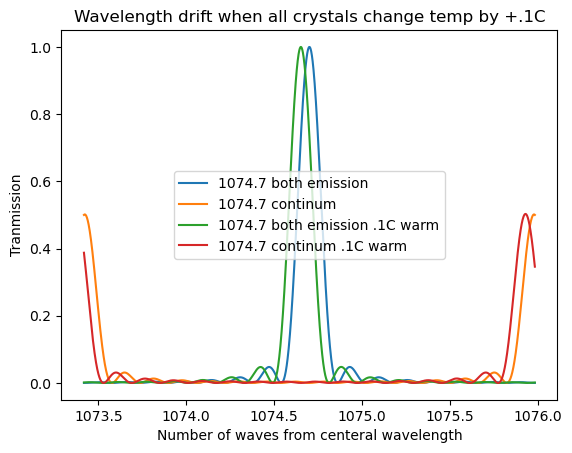

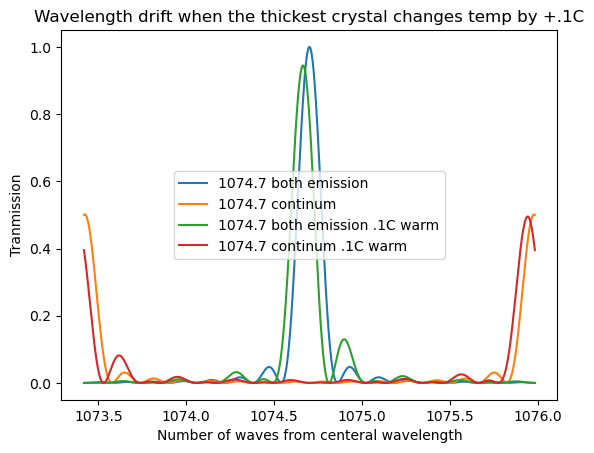

In [8]:
filterConfig1074 = getFilterConfig("tuning_calibration_1074.7.ini")

offsets = np.array(filterConfig1074["tempCof"])*.1

fig, ax = plt.subplots()
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7 both emission")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,cam="offband"),label="1074.7 continum")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,offsets=offsets),label="1074.7 both emission .1C warm")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,offsets=offsets,cam="offband"),label="1074.7 continum .1C warm")
ax.set_title('Wavelength drift when all crystals change temp by +.1C')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()



offsets = [0,0,0,0,np.array(filterConfig1074["tempCof"])[4]*.1]

fig, ax = plt.subplots()
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7),label="1074.7 both emission")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,cam="offband"),label="1074.7 continum")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,offsets=offsets),label="1074.7 both emission .1C warm")
ax.plot(*createStages(width=.5,filterConfig=filterConfig1074,wavelength=1074.7,offsets=offsets,cam="offband"),label="1074.7 continum .1C warm")
ax.set_title('Wavelength drift when the thickest crystal changes temp by +.1C')
ax.set(ylabel="Tranmission",xlabel="Number of waves from centeral wavelength")
ax.legend()
